In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
path = 'results/'
K = 10

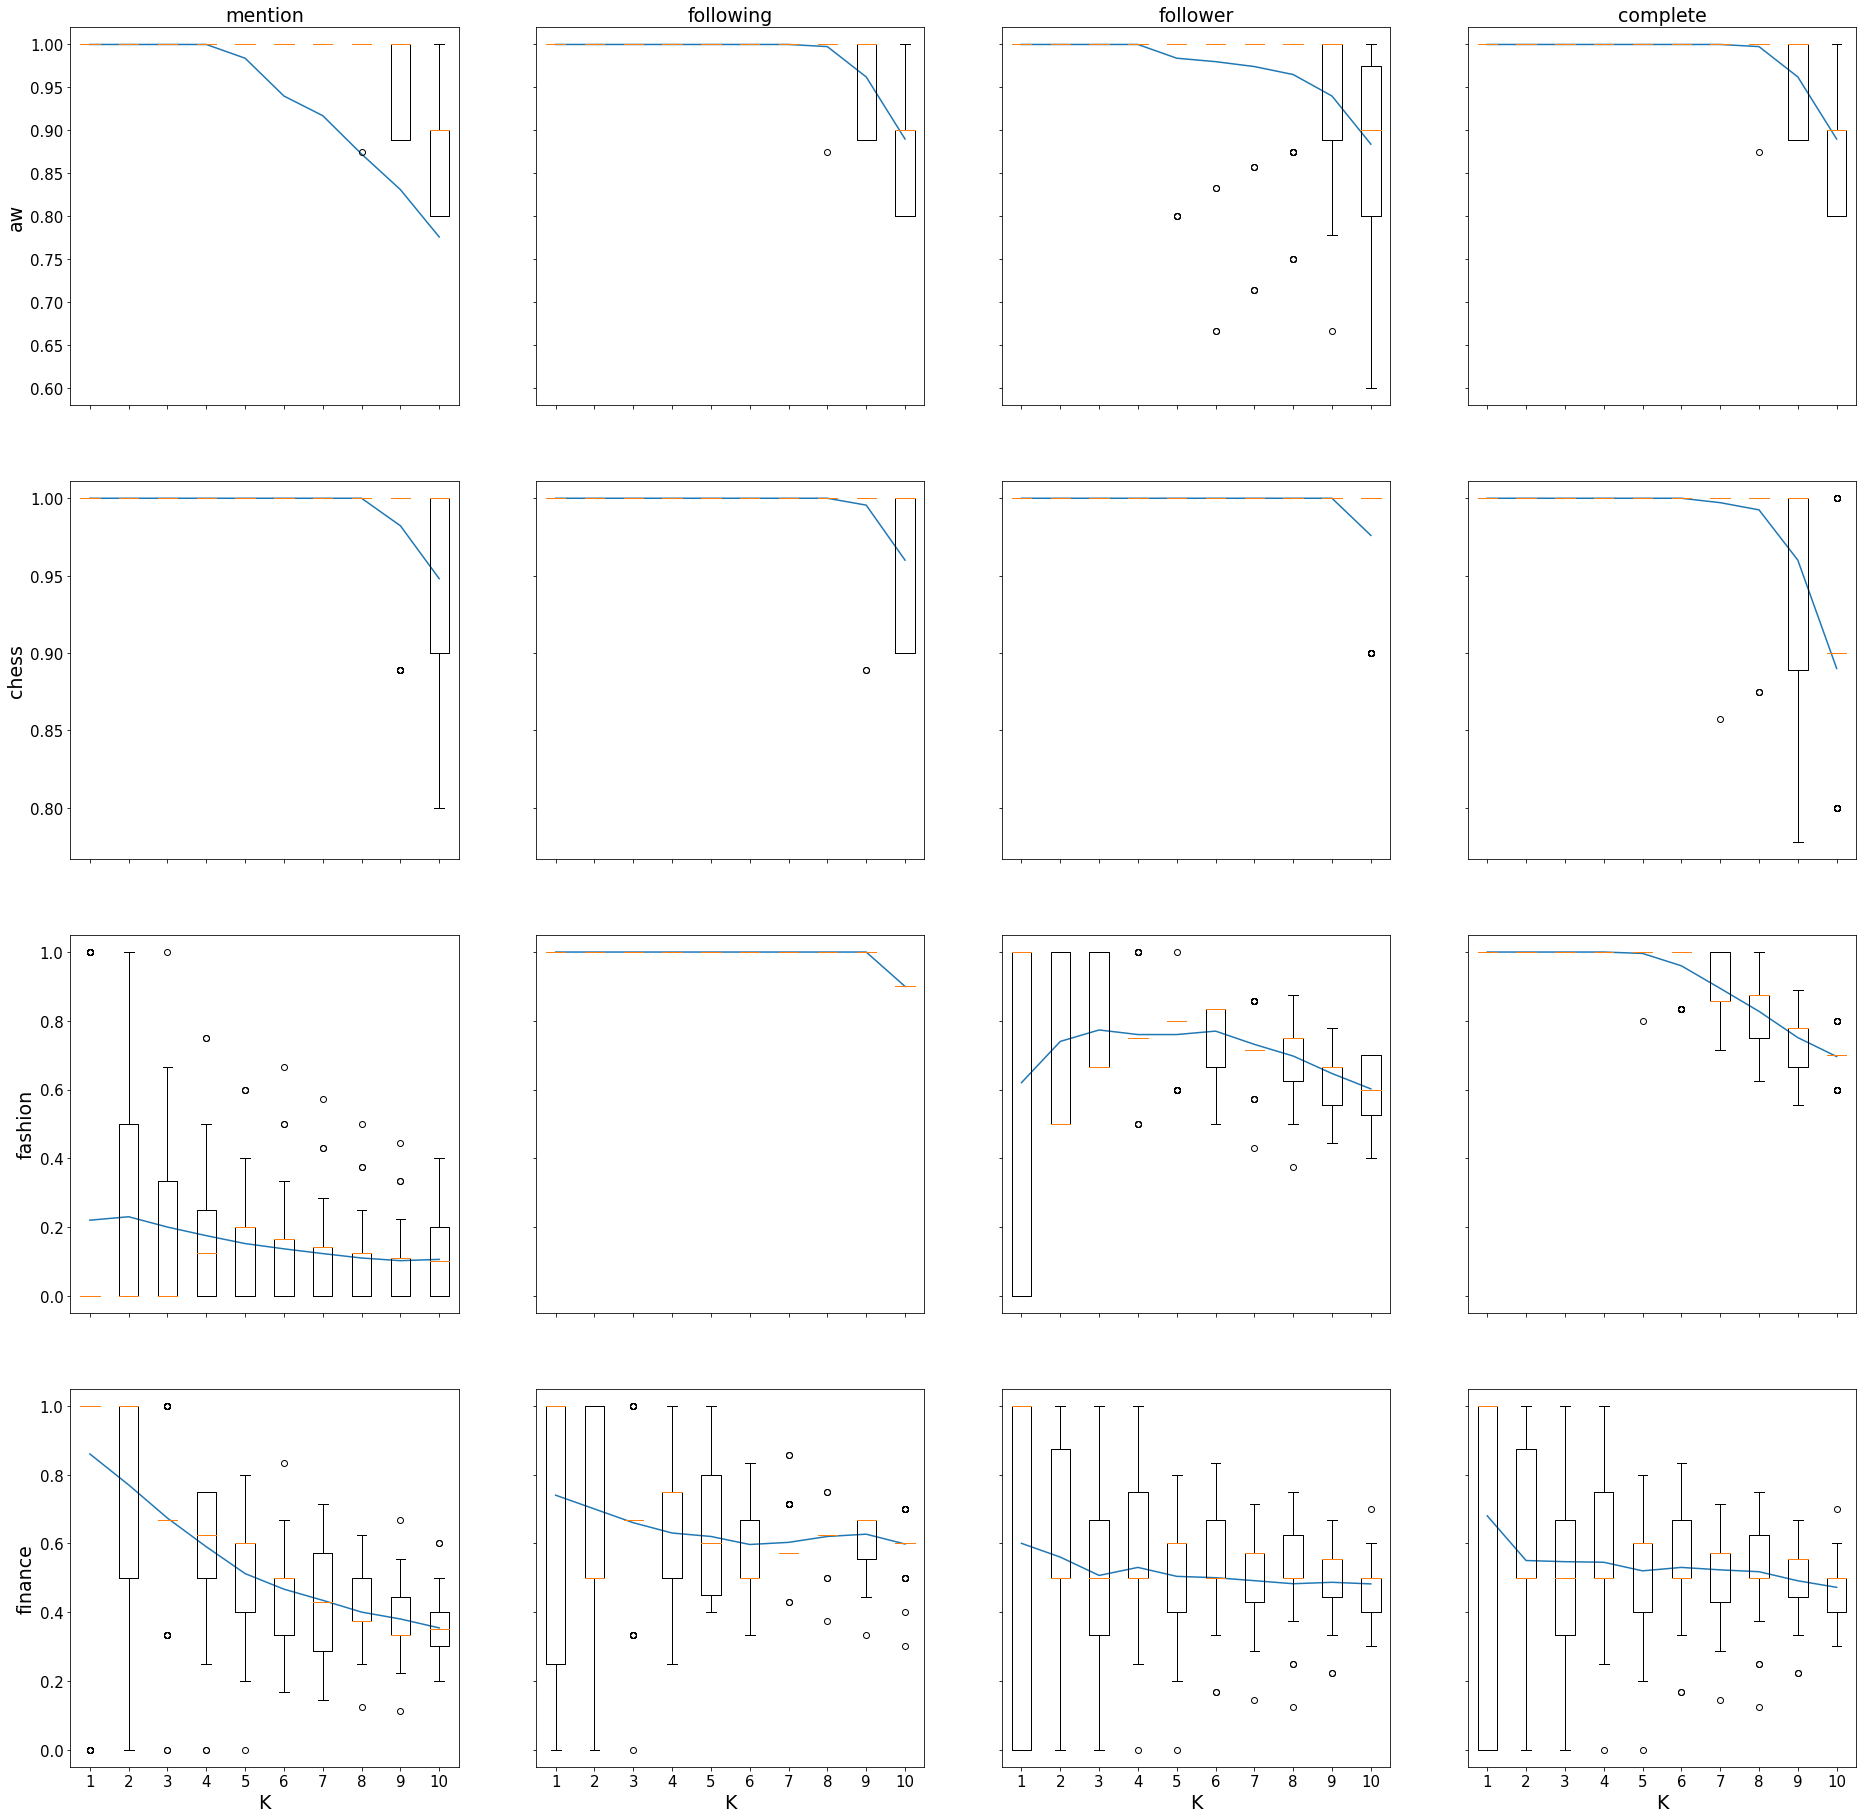

In [31]:
f, axes = plt.subplots(4, 4, sharex='col', sharey='row', figsize=(32, 32))
ticks_font = 15
labels_font = 19

k = 0 # row ax selector: domain
for domain in ['aw', 'chess', 'fashion', 'finance']:
    j = 0  # column ax selector: network type
    for network in ['mention', 'following', 'follower', 'complete']:
        mat = np.load(path + '{}_{}_matrix.npy'.format(domain, network))
        perf = np.load(path + '{}_{}_avg.npy'.format(domain, network))
        prec = [perf[i-1]/i for i in range(1, K+1)]


        axes[k, j].plot(range(1, K+1), prec)
        axes[k, j].boxplot(mat[:, :K])
        
        # title only for the first row plots
        if k == 0:
            axes[k, j].set_title(network, fontsize=labels_font)
        
        # yticks only for the left-most plots
        if j > 0:
            plt.setp(axes[k, j].get_yticklabels(), visible=False)
            # axes[k, j].set_yticks([])
        else:
            axes[k, j].set_ylabel(domain, fontsize=labels_font)
            axes[k, j].yaxis.set_tick_params(labelsize=ticks_font)
        
        # xticks only for the last row plots
        if k < 3:
            plt.setp(axes[k, j].get_xticklabels(), visible=False)
            # axes[k, j].set_xticks([])
        else:
            axes[k, j].set_xlabel('K', fontsize=labels_font)
            axes[k, j].xaxis.set_tick_params(labelsize=ticks_font)
            
        j += 1
    k += 1